# Evaluating language knowledge of ELL students from grades 8-12

## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import re

## Loading The Dataset

*Using Pandas Library, we’ll load the CSV file. Named it with ellTrainData for the dataset.*

In [2]:
ellTrainData = pd.read_csv('input/train.csv')

In [3]:
ellTrainData.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


## Data Profiling & Cleaning

*Get the number of columns and rows*

In [4]:
ellTrainData.shape

(3911, 8)

In [5]:
ellTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


*From the info, we know that there are 3911 entries and 8 columns.*

In [6]:
ellTrainData.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

*There are no null entries.*

In [7]:
ellTrainData.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
ellTrainData['full_text'] = ellTrainData['full_text'].astype(str)

In [9]:
ellTrainData['full_text'] = ellTrainData['full_text'].replace(r'[^A-Za-z0-9.,!?\']+', ' ', regex=True)

In [10]:
def remove_extra_whitespaces_func(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def add_whitespaces_func(text):
    return re.sub('(?<![A-Z])([.,-])(?![A-Z]+)', r' \g<1> ', text)

In [13]:
ellTrainData['full_text'] = ellTrainData['full_text'].apply(add_whitespaces_func)
ellTrainData['full_text'] = ellTrainData['full_text'].apply(remove_extra_whitespaces_func)

## Exploratory Analysis and Visualization

In [15]:
ellTrainData['text_len'] = ellTrainData['full_text'].apply(lambda x: len(x))
ellTrainData['words_num'] = ellTrainData['full_text'].apply(lambda x: len(x.split()))

In [16]:
ellTrainData.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len,words_num
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,1390,281
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,2648,551
2,00299B378633,"Dear , Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,1688,346
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,4035,802
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,1193,237


<AxesSubplot:xlabel='words_num', ylabel='Density'>

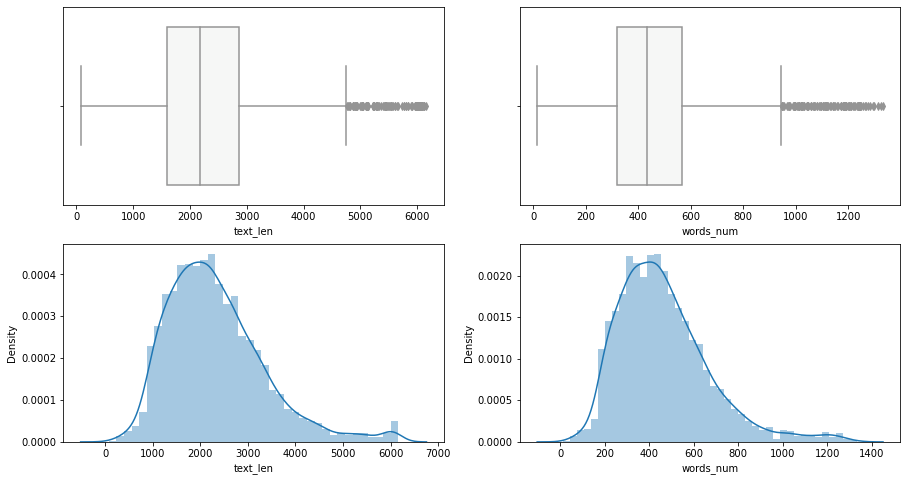

In [17]:
# Length of full_text and words num
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(ellTrainData['text_len'], palette='PRGn', ax = ax[0, 0])
sns.distplot(ellTrainData['text_len'], ax = ax[1, 0])
sns.boxplot(ellTrainData['words_num'], palette='PRGn', ax = ax[0, 1])
sns.distplot(ellTrainData['words_num'], ax = ax[1, 1])

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS


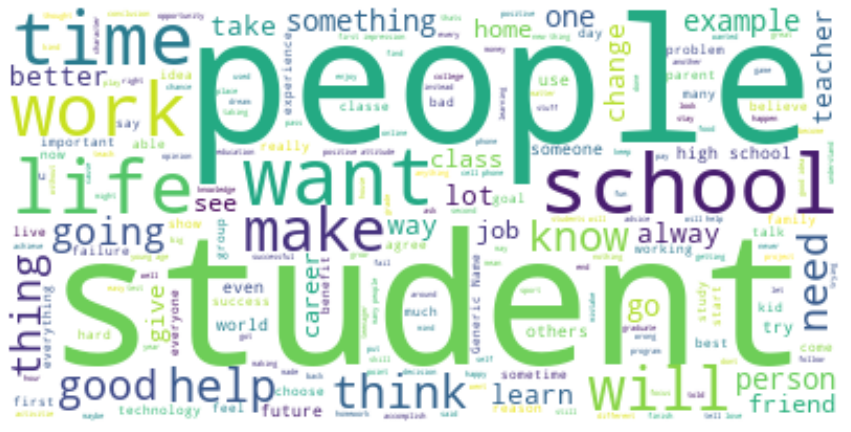

In [39]:
text = " ".join(i for i in ellTrainData['full_text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
wordsList = [i for i in wordcloud.words_]
def words_score(text, wordsList):
    score = 0
    for i in wordsList:
        score += text.count(i)*wordcloud.words_[i]
        print(text.count(i), wordcloud.words_[i])
    return score


In [74]:
ellTrainData['words_score'] = ellTrainData['full_text'].apply(words_score, wordsList=wordsList)

Text(0.5, 1.0, 'Correlation Heatmap')

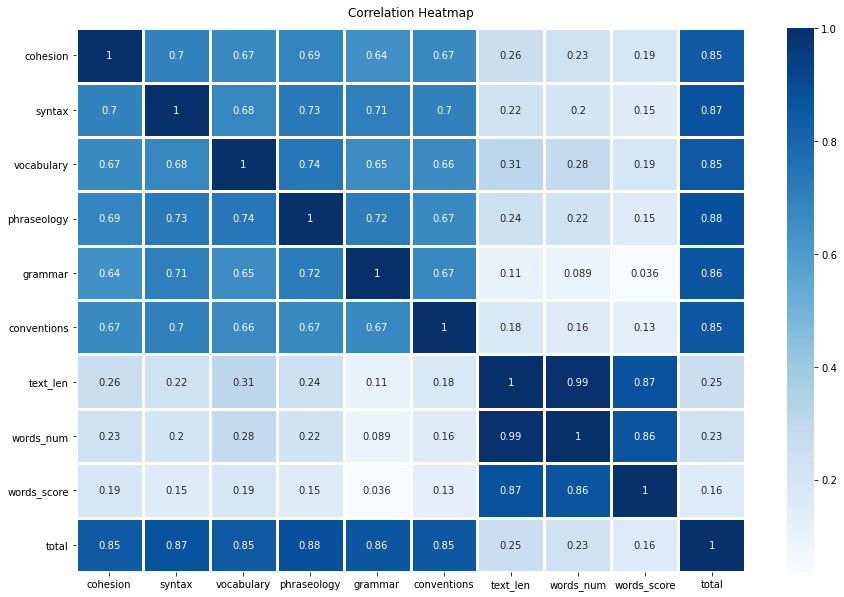

In [78]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(ellTrainData.corr(), cmap = "Blues", annot=True, linewidth=3)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [77]:
ellTrainData['total'] = ellTrainData[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].sum(axis=1)

In [79]:
ellTrainData

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len,words_num,words_score,total
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,1390,281,30.885022,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,2648,551,61.492335,14.5
2,00299B378633,"Dear , Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,1688,346,36.824317,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,4035,802,68.903877,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,1193,237,27.892159,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,981,189,18.639119,17.0
3907,FFD9A83B0849,"Working alone , students do not have to argue ...",4.0,4.0,4.0,4.0,3.5,3.0,2621,495,57.456123,22.5
3908,FFDC4011AC9C,A problem is a chance for you to do your best ...,2.5,3.0,3.0,3.0,3.5,3.0,1299,268,19.763436,18.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,2853,541,53.349604,26.0
